# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
email = pd.read_csv('emails.csv')

In [3]:
email

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
email.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# VISUALIZE THE DATA 

In [6]:
spam0 = email[email['spam'] == 0]

In [7]:
spam1 = email[email['spam'] == 1]

In [8]:
spam0

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [9]:
spam1

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [10]:
print('spam1 percentage = ',(len(spam1)/len(email))*100,'%')

spam1 percentage =  23.88268156424581 %


In [11]:
print('spam0 percentage = ',(len(spam0)/len(email))*100,'%')

spam0 percentage =  76.11731843575419 %


<AxesSubplot:xlabel='spam', ylabel='count'>

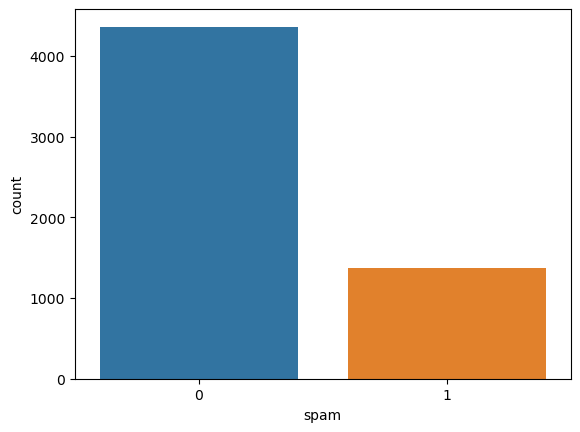

In [12]:
sns.countplot(x = email['spam'],label = 'span1 vs spam0') #COUNTPLOT

# COUNT VECTORIZTION

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spam1spam0_CountVectorizer = vectorizer.fit_transform(email['text'])

In [14]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [15]:
spam1spam0_CountVectorizer.shape

(5728, 37303)

In [16]:
label = email['spam']
x = spam1spam0_CountVectorizer
y = label

In [17]:
x.shape

(5728, 37303)

In [18]:
y.shape

(5728,)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [21]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train,y_train)

MultinomialNB()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
cm = confusion_matrix(y_train,y_predict_train)

In [25]:
cm

array([[3451,   15],
       [   1, 1115]], dtype=int64)

<AxesSubplot:>

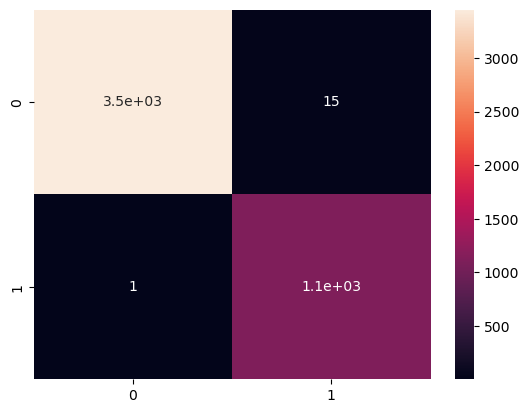

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
y_predict_test = NB_classifier.predict(x_test)
y_predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
cm = confusion_matrix(y_test,y_predict_test)

In [29]:
cm

array([[881,  13],
       [  3, 249]], dtype=int64)

<AxesSubplot:>

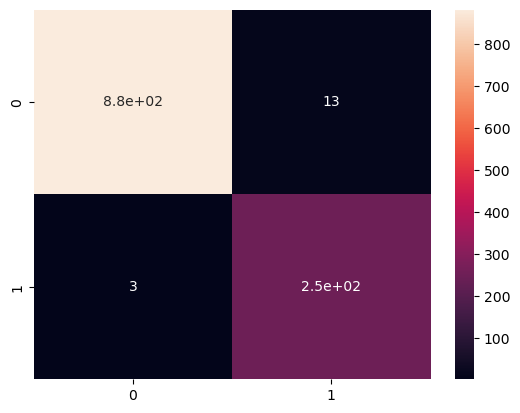

In [30]:
sns.heatmap(cm,annot=True)

In [31]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       894
           1       0.95      0.99      0.97       252

    accuracy                           0.99      1146
   macro avg       0.97      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

